In [1]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [2]:
!wget -O cars_clus.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv

--2019-01-29 03:55:18--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17774 (17K) [text/csv]
Saving to: ‘cars_clus.csv’

cars_clus.csv       100%[=====================>]  17.36K  --.-KB/s   in 0.02s  

2019-01-29 03:55:18 (827 KB/s) - ‘cars_clus.csv’ saved [17774/17774]



In [5]:
#Read data
filename = 'cars_clus.csv'

#Read csv
pdf = pd.read_csv(filename)
print ("Shape of dataset: ", pdf.shape)

pdf.head(200)

Shape of dataset:  (159, 16)


manufact          model    sales  resale    type   price engine_s  \
0         Acura        Integra   16.919  16.360   0.000  21.500    1.800   
1         Acura             TL   39.384  19.875   0.000  28.400    3.200   
2         Acura             CL   14.114  18.225   0.000  $null$    3.200   
3         Acura             RL    8.588  29.725   0.000  42.000    3.500   
4          Audi             A4   20.397  22.255   0.000  23.990    1.800   
5          Audi             A6   18.780  23.555   0.000  33.950    2.800   
6          Audi             A8    1.380  39.000   0.000  62.000    4.200   
7           BMW           323i   19.747  $null$   0.000  26.990    2.500   
8           BMW           328i    9.231  28.675   0.000  33.400    2.800   
9           BMW           528i   17.527  36.125   0.000  38.900    2.800   
10        Buick        Century   91.561  12.475   0.000  21.975    3.100   
11        Buick          Regal   39.350  13.740   0.000  25.300    3.800   
12        Buick    Park Avenue   27.851  20.190   0.000  31.965    3.800   
13        Buick        LeSabre   83.257  13.360   0.000  27.885    3.800   
14     Cadillac        DeVille   63.729  22.525   0.000  39.895    4.600   
15     Cadillac        Seville   15.943  27.100   0.000  44.475    4.600   
16     Cadillac       Eldorado    6.536  25.725   0.000  39.665    4.600   
17     Cadillac         Catera   11.185  18.225   0.000  31.010    3.000   
18     Cadillac       Escalade   14.785  $null$   1.000  46.225    5.700   
19    Chevrolet       Cavalier  145.519   9.250   0.000  13.260    2.200   
20    Chevrolet         Malibu  135.126  11.225   0.000  16.535    3.100   
21    Chevrolet         Lumina   24.629  10.310   0.000  18.890    3.100   
22    Chevrolet    Monte Carlo   42.593  11.525   0.000  19.390    3.400   
23    Chevrolet         Camaro   26.402  13.025   0.000  24.340    3.800   
24    Chevrolet       Corvette   17.947  36.225   0.000  45.705    5.700   
25    Chevrolet          Prizm   32.299   9.125   0.000  13.960    1.800   
26    Chevrolet          Metro   21.855   5.160   0.000   9.235    1.000   
27    Chevrolet         Impala  107.995  $null$   0.000  18.890    3.400   
28     Chrysler  Sebring Coupe    7.854  12.360   0.000  19.840    2.500   
29     Chrysler  Sebring Conv.   32.775  14.180   0.000  24.495    2.500   
..          ...            ...      ...     ...     ...     ...      ...   
129      Saturn             SL   80.620   9.200   0.000  10.685    1.900   
130      Saturn             SC   24.546  10.590   0.000  12.535    1.900   
131      Saturn             SW    5.223  10.790   0.000  14.290    1.900   
132      Saturn             LW    8.472  $null$   0.000  18.835    2.200   
133      Saturn             LS   49.989  $null$   0.000  15.010    2.200   
134      Subaru        Outback   47.107  $null$   0.000  22.695    2.500   
135      Subaru       Forester   33.028  $null$   1.000  20.095    2.500   
136      Toyota        Corolla  142.535  10.025   0.000  13.108    1.800   
137      Toyota          Camry  247.994  13.245   0.000  17.518    2.200   
138      Toyota         Avalon   63.849  18.140   0.000  25.545    3.000   
139      Toyota         Celica   33.269  15.445   0.000  16.875    1.800   
140      Toyota         Tacoma   84.087   9.575   1.000  11.528    2.400   
141      Toyota         Sienna   65.119  $null$   1.000  22.368    3.000   
142      Toyota           RAV4   25.106  13.325   1.000  16.888    2.000   
143      Toyota        4Runner   68.411  19.425   1.000  22.288    2.700   
144      Toyota   Land Cruiser    9.835  34.080   1.000  51.728    4.700   
145  Volkswagen           Golf    9.761  11.425   0.000  14.900    2.000   
146  Volkswagen          Jetta   83.721  13.240   0.000  16.700    2.000   
147  Volkswagen         Passat   51.102  16.725   0.000  21.200    1.800   
148  Volkswagen         Cabrio    9.569  16.575   0.000  19.990    2.000   
149  Volkswagen            GTI    5.596  13.760   0.000

In [7]:
#Dropping null value
print ("Shape of dataset before cleaning: ", pdf.size)
pdf[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = pdf[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", pdf.size)
pdf.head(200)

Shape of dataset before cleaning:  1872
Shape of dataset after cleaning:  1872


manufact              model    sales  resale  type   price  engine_s  \
0         Acura            Integra   16.919  16.360   0.0  21.500       1.8   
1         Acura                 TL   39.384  19.875   0.0  28.400       3.2   
2         Acura                 RL    8.588  29.725   0.0  42.000       3.5   
3          Audi                 A4   20.397  22.255   0.0  23.990       1.8   
4          Audi                 A6   18.780  23.555   0.0  33.950       2.8   
5          Audi                 A8    1.380  39.000   0.0  62.000       4.2   
6           BMW               328i    9.231  28.675   0.0  33.400       2.8   
7           BMW               528i   17.527  36.125   0.0  38.900       2.8   
8         Buick            Century   91.561  12.475   0.0  21.975       3.1   
9         Buick              Regal   39.350  13.740   0.0  25.300       3.8   
10        Buick        Park Avenue   27.851  20.190   0.0  31.965       3.8   
11        Buick            LeSabre   83.257  13.360   0.0  27.885       3.8   
12     Cadillac            DeVille   63.729  22.525   0.0  39.895       4.6   
13     Cadillac           Eldorado    6.536  25.725   0.0  39.665       4.6   
14     Cadillac             Catera   11.185  18.225   0.0  31.010       3.0   
15    Chevrolet           Cavalier  145.519   9.250   0.0  13.260       2.2   
16    Chevrolet             Malibu  135.126  11.225   0.0  16.535       3.1   
17    Chevrolet             Lumina   24.629  10.310   0.0  18.890       3.1   
18    Chevrolet        Monte Carlo   42.593  11.525   0.0  19.390       3.4   
19    Chevrolet             Camaro   26.402  13.025   0.0  24.340       3.8   
20    Chevrolet           Corvette   17.947  36.225   0.0  45.705       5.7   
21    Chevrolet              Prizm   32.299   9.125   0.0  13.960       1.8   
22    Chevrolet              Metro   21.855   5.160   0.0   9.235       1.0   
23     Chrysler      Sebring Coupe    7.854  12.360   0.0  19.840       2.5   
24     Chrysler      Sebring Conv.   32.775  14.180   0.0  24.495       2.5   
25     Chrysler           Concorde   31.148  13.725   0.0  22.245       2.7   
26     Chrysler             Cirrus   32.306  12.640   0.0  16.480       2.0   
27     Chrysler                LHS   13.462  17.325   0.0  28.340       3.5   
28        Dodge               Neon   76.034   7.750   0.0  12.640       2.0   
29        Dodge            Avenger    4.734  12.545   0.0  19.045       2.5   
..          ...                ...      ...     ...   ...     ...       ...   
87   Oldsmobile             Aurora   14.690  19.890   0.0  36.229       4.0   
88   Oldsmobile            Bravada   20.017  19.925   1.0  31.598       4.3   
89   Oldsmobile         Silhouette   24.361  15.240   1.0  25.345       3.4   
90     Plymouth               Neon   32.734   7.750   0.0  12.640       2.0   
91     Plymouth             Breeze    5.240   9.800   0.0  16.080       2.0   
92     Plymouth            Voyager   24.155  12.025   1.0  18.850       2.4   
93      Pontiac            Sunfire   51.645  13.790   0.0  21.610       2.4   
94      Pontiac           Grand Am  131.097  10.290   0.0  19.720       3.4   
95      Pontiac           Firebird   19.911  17.805   0.0  25.310       3.8   
96      Pontiac         Grand Prix   92.364  14.010   0.0  21.665       3.8   
97      Pontiac         Bonneville   35.945  13.225   0.0  23.755       3.8   
98      Porsche             Boxter    8.982  41.250   0.0  41.430       2.7   
99      Porsche      Carrera Coupe    1.280  60.625   0.0  71.020       3.4   
100     Porsche  Carrera Cabriolet    1.866  67.550   0.0  74.970       3.4   
101      Saturn                 SL   80.620   9.200   0.0  10.685       1.9   
102      Saturn                 SC   24.546  10.590   0.0  12.535       1.9   
103      Saturn                 SW    5.223  10.790   0.0  14.290       1.9   
104      Toyota            Corolla  142.535  10.025   0.0  13.108       1.8   
105      Toyota              Camry  247.994  13.245   0.0

In [8]:
featureset = pdf[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

In [10]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:200]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333],
       [0.45714286, 0.64556962, 0.44251627, 0.68263473, 0.64980027,
        0.62329193, 0.61751152, 0.2       ],
       [0.25714286, 0.34936709, 0.31887202, 0.35329341, 0.35419441,
        0.40434783, 0.29032258, 0.3       ],
       [0.25714286, 0.34936709, 0.40780911, 0.49700599, 0.51398136,
        0.48975155, 0.37788018, 0.32666667],
       [0.3       , 0.30379747, 0.35574837, 0.60479042, 0.60186418,
        0.45745342, 0.331797

In [12]:
#Clustering using scipy
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

In [13]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([ 1,  5,  5,  6,  5,  4,  6,  5,  5,  5,  5,  5,  4,  4,  5,  1,  6,
        5,  5,  5,  4,  2, 11,  6,  6,  5,  6,  5,  1,  6,  6, 10,  9,  8,
        9,  3,  5,  1,  7,  6,  5,  3,  5,  3,  8,  7,  9,  2,  6,  6,  5,
        4,  2,  1,  6,  5,  2,  7,  5,  5,  5,  4,  4,  3,  2,  6,  6,  5,
        7,  4,  7,  6,  6,  5,  3,  5,  5,  6,  5,  4,  4,  1,  6,  5,  5,
        5,  6,  4,  5,  4,  1,  6,  5,  6,  6,  5,  5,  5,  7,  7,  7,  2,
        2,  1,  2,  6,  5,  1,  1,  1,  7,  8,  1,  1,  6,  1,  1],
      dtype=int32)

In [15]:
#Determine number of clusters
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters


array([1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3, 3, 3, 3, 2, 1,
       5, 3, 3, 3, 3, 3, 1, 3, 3, 4, 4, 4, 4, 2, 3, 1, 3, 3, 3, 2, 3, 2,
       4, 3, 4, 1, 3, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 2, 2, 2, 1, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3, 3, 3, 2,
       3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1,
       3, 4, 1, 1, 3, 1, 1], dtype=int32)

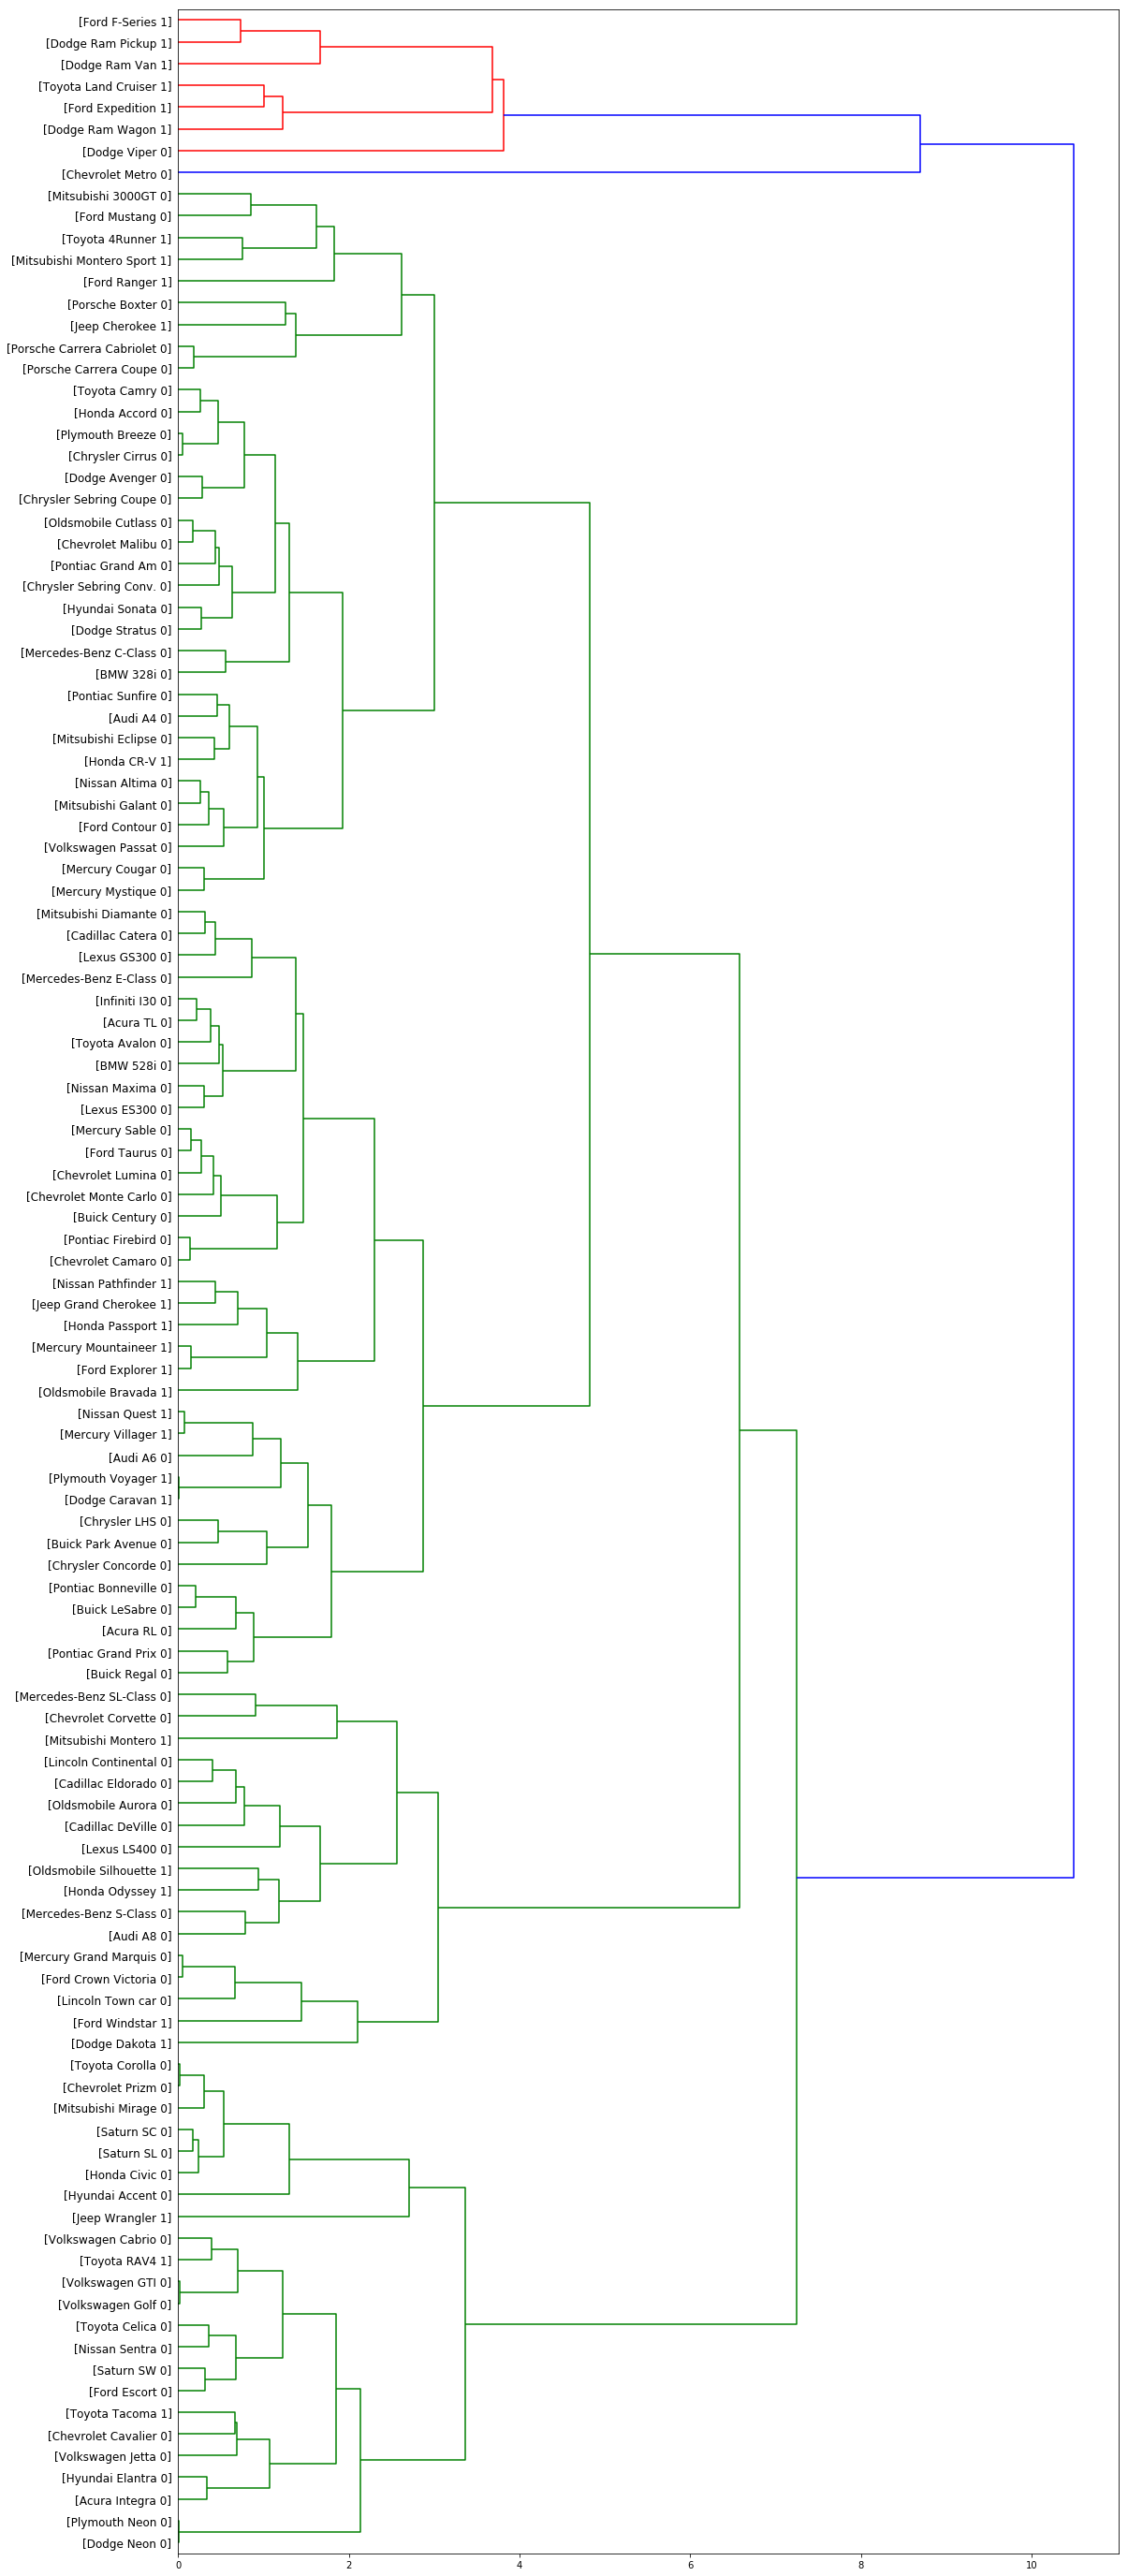

In [16]:
#plot the dendogram
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])) )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [17]:
#Using Scikit learn
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


In [18]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([1, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 2, 3, 3, 2, 1, 1, 2, 2, 2, 5, 1,
       4, 1, 1, 2, 1, 2, 1, 1, 1, 5, 0, 0, 0, 3, 2, 1, 2, 1, 2, 3, 2, 3,
       0, 3, 0, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 3, 2, 3, 1, 2, 3, 5, 1, 1, 2, 3, 2, 1, 3,
       2, 3, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 0, 1, 1, 1, 1, 1])

In [19]:
pdf['cluster_'] = agglom.labels_
pdf.head(0)

manufact    model   sales  resale  type  price  engine_s  horsepow  \
0    Acura  Integra  16.919  16.360   0.0  21.50       1.8     140.0   
1    Acura       TL  39.384  19.875   0.0  28.40       3.2     225.0   
2    Acura       RL   8.588  29.725   0.0  42.00       3.5     210.0   
3     Audi       A4  20.397  22.255   0.0  23.99       1.8     150.0   
4     Audi       A6  18.780  23.555   0.0  33.95       2.8     200.0   

   wheelbas  width  length  curb_wgt  fuel_cap   mpg  lnsales  partition  \
0     101.2   67.3   172.4     2.639      13.2  28.0    2.828        0.0   
1     108.1   70.3   192.9     3.517      17.2  25.0    3.673        0.0   
2     114.6   71.4   196.6     3.850      18.0  22.0    2.150        0.0   
3     102.6   68.2   178.0     2.998      16.4  27.0    3.015        0.0   
4     108.7   76.1   192.0     3.561      18.5  22.0    2.933        0.0   

   cluster_  
0         1  
1         2  
2         2  
3         1  
4         2